In [1]:
#%autosave 0
from IPython.core.display import HTML, display
display(HTML('<style>.container { width:100%; !important } </style>'))

# Moore's Shortest Path Algorithm

Given a node `source` and a dictionary `Edges`, the function call 
$\texttt{shortest_path}(\texttt{source}, \texttt{Edges})$ 
computes the distances of all nodes from `source`.

In [2]:
def shortest_path(source, Edges):
    Distance = { source: 0 }
    Fringe   = [ source ]
    while len(Fringe) > 0:
        u = Fringe.pop()
        display(toDot(source, u, Edges, Fringe, Distance))
        print('_' * 80)
        for v, l in Edges[u]:
            dv = Distance.get(v, None)
            if dv == None or Distance[u] + l < dv:
                Distance[v] = Distance[u] + l
                if v not in Fringe: 
                    Fringe = Fringe + [v] 
    display(toDot(source, None, Edges, Fringe, Distance))
    return Distance

## Code to Display the Directed Graph

In [3]:
import graphviz as gv

The function $\texttt{toDot}(\texttt{source}, \texttt{Edges}, \texttt{Fringe}, \texttt{Distance})$ takes a graph that is represented by 
its `Edges`, a set of nodes `Fringe`, and a dictionary `Distance` that has the distance of a node from the node `source`.

In [4]:
def toDot(source, p, Edges, Fringe, Distance):
    V = set()
    for x in Edges.keys():
        V.add(x)
    dot = gv.Digraph(node_attr={'shape': 'record', 'style': 'rounded'})
    dot.attr(rankdir='LR', size='8,5')
    for x in V:
        if x == source:
            dot.node(str(x), color='blue', shape='doublecircle')
        else:
            d = str(Distance.get(x, ''))
            if x == p:
                dot.node(str(x), label='{' + str(x) + '|' + d + '}', color='magenta')
            elif x in Fringe:
                dot.node(str(x), label='{' + str(x) + '|' + d + '}', color='red')
            else:
                dot.node(str(x), label='{' + str(x) + '|' + d + '}')
    for u in V:
        for v, l in Edges[u]:
            dot.edge(str(u), str(v), label=str(l))
    return dot

## Code for Testing

In [5]:
Edges = { 'a': [ ('c', 2), ('b', 9)], 
          'b': [('d', 1)],
          'c': [('e', 5), ('g', 3)],  
          'd': [('f', 2), ('e', 4)],  
          'e': [('f', 1), ('b', 2)],
          'f': [('h', 5)],
          'g': [('e', 1)],
          'h': []
        }

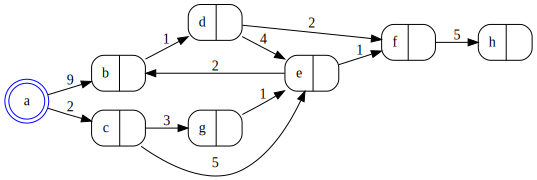

________________________________________________________________________________


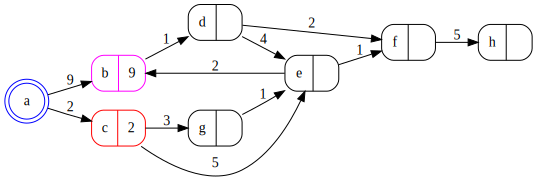

________________________________________________________________________________


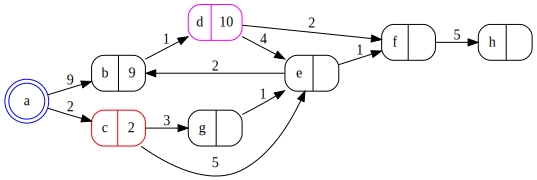

________________________________________________________________________________


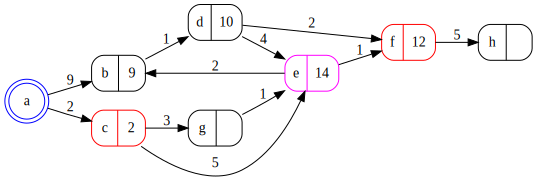

________________________________________________________________________________


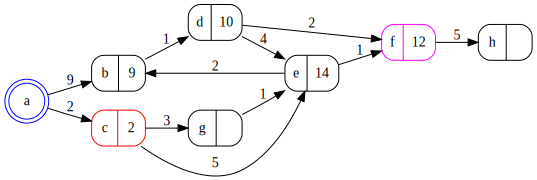

________________________________________________________________________________


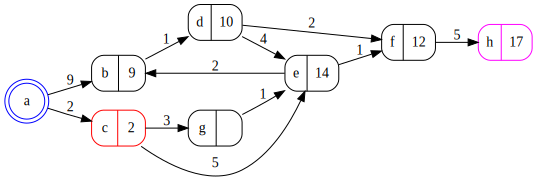

________________________________________________________________________________


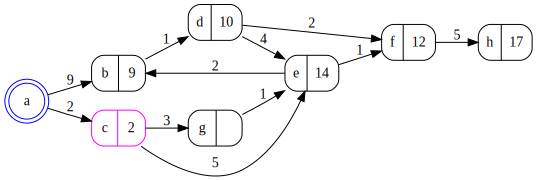

________________________________________________________________________________


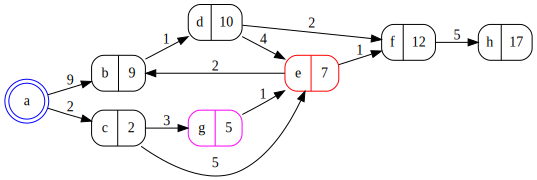

________________________________________________________________________________


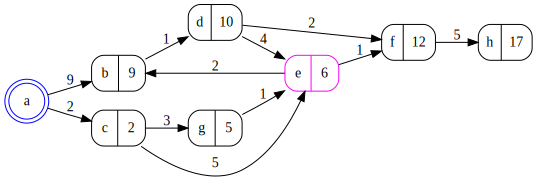

________________________________________________________________________________


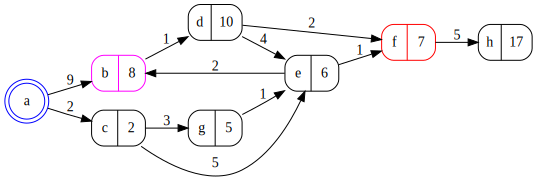

________________________________________________________________________________


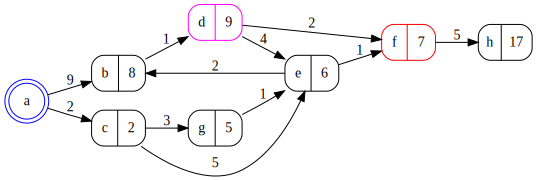

________________________________________________________________________________


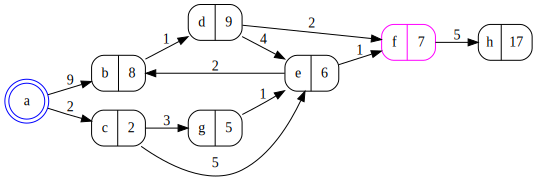

________________________________________________________________________________


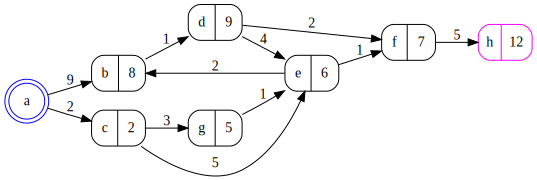

________________________________________________________________________________


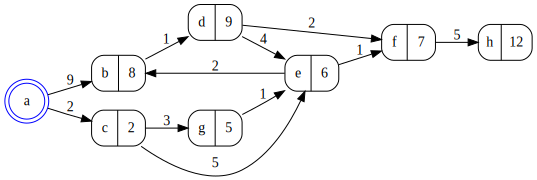

In [6]:
M  = { x for x in Edges.keys() }
s  = 'a'
sp = shortest_path(s, Edges)